In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import ast
import os
import sys

from pathlib import Path

lib_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'lib'))
print("Lib path:", lib_path)

# Append the absolute path to sys.path
sys.path.append(lib_path)

# Now, try importing onedmodel
from onedmodel import *

Lib path: /Users/guime/projects/SLTforSGD/code/lib


In [2]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

In [3]:
# Initialise
nSGD = 10**4
nsamples = 10**4
shuffle = True
batch_size= 20
w0 = 1.8
seed_init = 1
seed_data = 1
nw0 = 2
wmax = nw0 * w0
frac_max = 10**-3
model = PolyModel(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
# Run parameter sweep
w0_range = np.arange(1.2, 2, 0.1)
batch_range = np.arange(5, 60, 5)
lr_range = [0.01]
df = sgd_runner.parameter_sweep(w0_range, batch_range, lr_range, 
                        model, frac_max=frac_max)

Running experiment 0 over 88
Running experiment 10 over 88


KeyboardInterrupt: 

In [7]:
df

,escape_rate,lr,B,w0,fraction
0,2.871594e-05,0.01,5,1.2,"[0.34993446920052423, 0.30275229357798167, 0.2..."
1,6.378452e-19,0.01,10,1.2,"[0.35185185185185186, 0.2962962962962963, 0.29..."
2,1.449467e-18,0.01,15,1.2,"[0.3453815261044177, 0.30254350736278446, 0.29..."
3,2.385245e-17,0.01,20,1.2,"[0.34185733512786004, 0.30955585464333785, 0.3..."
4,7.363850e-18,0.01,25,1.2,"[0.3423545331529093, 0.2963464140730717, 0.286..."
...,...,...,...,...,...
83,3.280059e-01,0.01,35,1.9,"[0.27044025157232704, 0.23018867924528302, 0.1..."
84,3.301384e-01,0.01,40,1.9,"[0.2608142493638677, 0.22900763358778625, 0.16..."
85,3.433874e-01,0.01,45,1.9,"[0.27543424317617865, 0.24069478908188585, 0.1..."
86,3.652829e-01,0.01,50,1.9,"[0.27633209417596033, 0.24287484510532836, 0.1..."


<ipython-input-23-9566fa6d89eb>:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1)


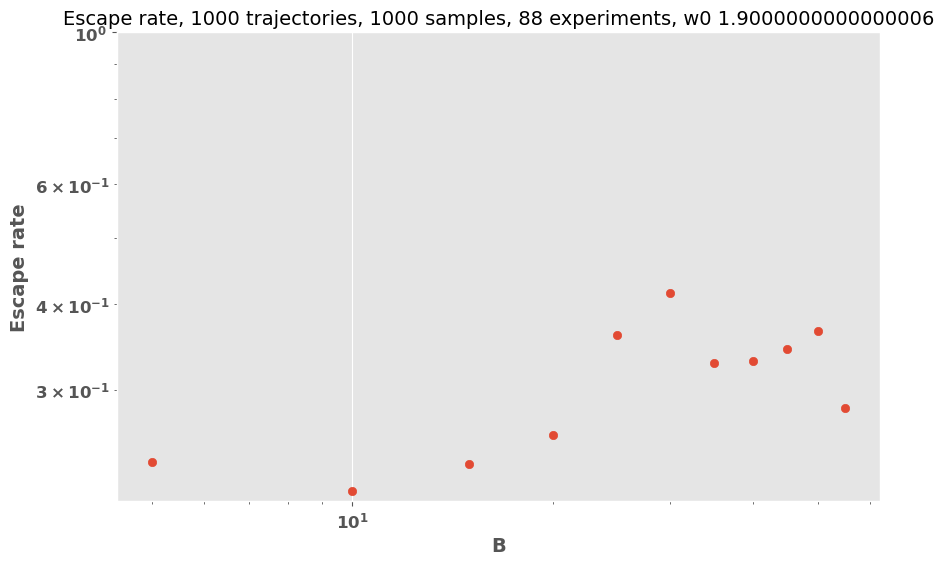

In [23]:
%matplotlib inline
from scipy.interpolate import griddata
import matplotlib
cleaned_df = df.copy().dropna()
w0s = list(sorted(set(cleaned_df["w0"])) )
w0 = w0s[7]
x = cleaned_df['B'].loc[cleaned_df['w0'] == w0]
y = cleaned_df['escape_rate'].loc[cleaned_df['w0'] == w0]
nexp = len(cleaned_df)
# Create the scatter plot
plt.scatter(x, y)
# Adding a colorbar to show the values of escape_rate
# Adding labels and title
plt.xlabel('B')
plt.ylabel('Escape rate')
plt.yscale('log')
plt.xscale('log')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples, {nexp} experiments, w0 {w0}')
plt.ylim(0, 1)
plt.show()

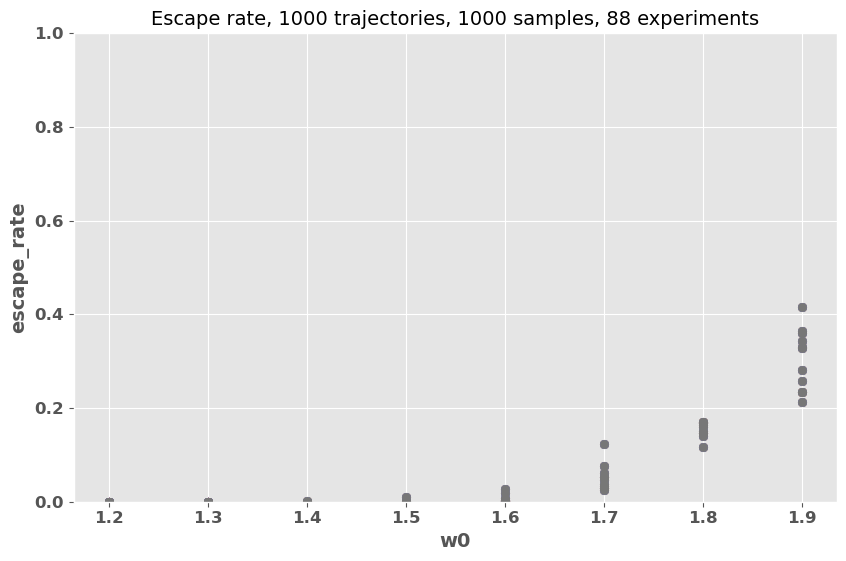

In [28]:
for batch_size in batch_range:
    plt.scatter(cleaned_df['w0'], cleaned_df['escape_rate'], label = f"B {batch_size}")
    plt.ylim((0, 1))
    plt.xlabel("w0")
    plt.ylabel("escape_rate")
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples, {nexp} experiments')
plt.show()

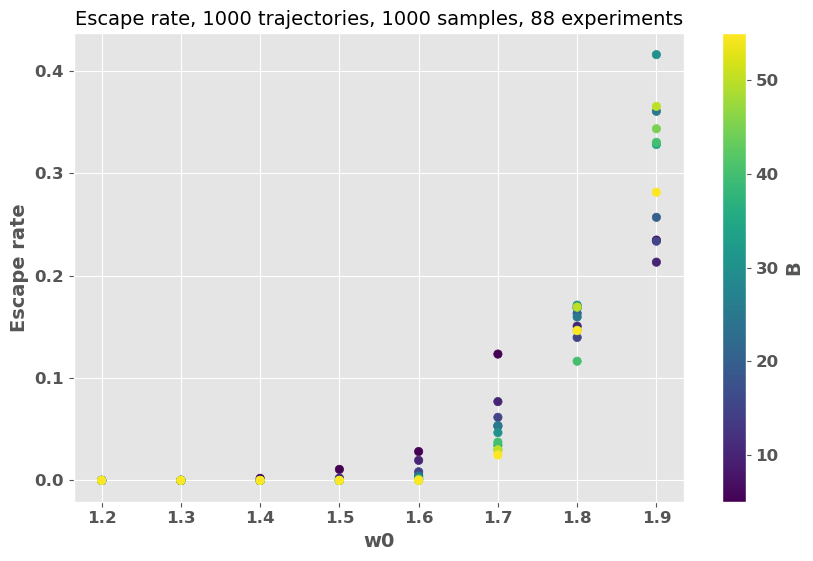

In [29]:
%matplotlib inline
from scipy.interpolate import griddata
import matplotlib
cleaned_df = df.copy().dropna()
cleaned_df["escape_rate"] = cleaned_df["escape_rate"].abs()
escape_rate = cleaned_df["escape_rate"]
nexp = len(cleaned_df)
# Create the scatter plot
plt.scatter(cleaned_df['w0'], cleaned_df['escape_rate'], c=cleaned_df['B'], cmap='viridis')

# Adding a colorbar to show the values of escape_rate
plt.colorbar(label='B')

# Adding labels and title
plt.xlabel('w0')
plt.ylabel('Escape rate')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples, {nexp} experiments')
plt.show()

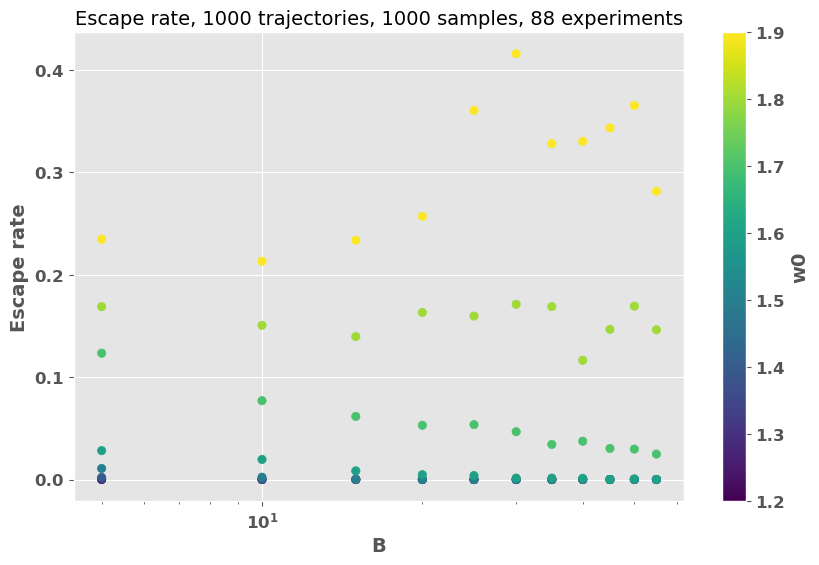

In [26]:
%matplotlib inline
from scipy.interpolate import griddata
import matplotlib
# Create the scatter plot
plt.scatter(cleaned_df['B'], cleaned_df['escape_rate'], c=cleaned_df['w0'], cmap='viridis')

# Adding a colorbar to show the values of escape_rate
plt.colorbar(label='w0')

# Adding labels and title
plt.xlabel('B')
plt.ylabel('Escape rate')
plt.xscale('log')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples, {nexp} experiments')
plt.show()

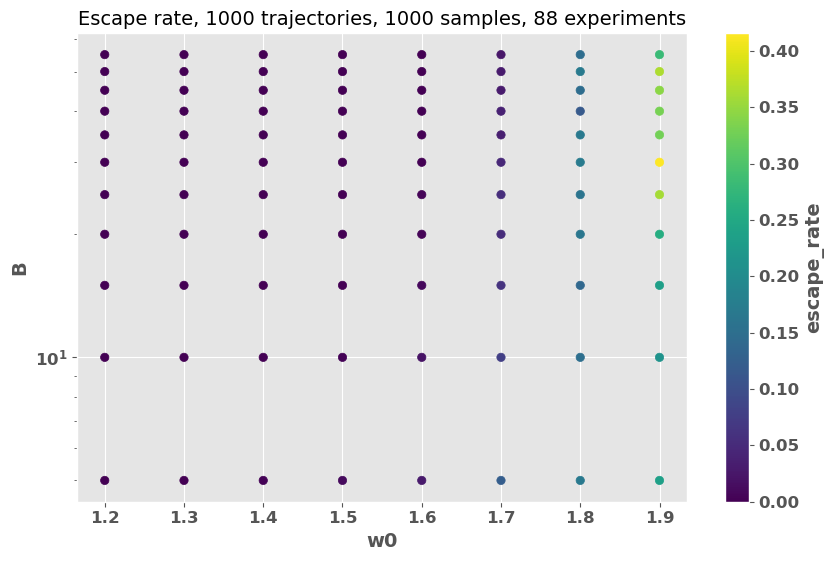

In [27]:
# Create the scatter plot
plt.scatter(cleaned_df['w0'], cleaned_df['B'], c=cleaned_df['escape_rate'], cmap='viridis')

# Adding a colorbar to show the values of escape_rate
plt.colorbar(label='escape_rate')

# Adding labels and title
plt.xlabel('w0')
plt.ylabel('B')
plt.yscale('log')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples, {nexp} experiments')
plt.show()

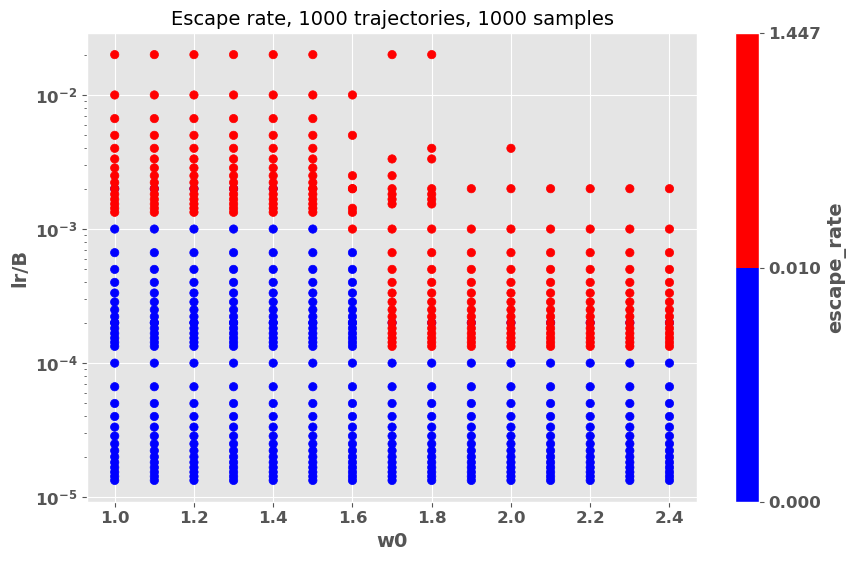

In [33]:
import matplotlib.colors as mcolors

# Assuming cleaned_df and other variables (nSGD, nsamples) are defined and available

# Define a custom color map with two colors, one for escape_rate > 0.1 and another for escape_rate < 0.1
colors = ['blue', 'red']  # Blue for escape_rate < 0.1, Red for escape_rate > 0.1
cmap = mcolors.ListedColormap(colors)
bounds = [0, 0.01, max(cleaned_df['escape_rate'])]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create the scatter plot with the custom colormap
plt.scatter(cleaned_df['w0'], cleaned_df['B'], c=cleaned_df['escape_rate'], cmap=cmap, norm=norm)

# Adding a colorbar to show the values of escape_rate
plt.colorbar(label='escape_rate')

# Adding labels and title
plt.xlabel('w0')
plt.ylabel('lr/B')
plt.yscale('log')
plt.title(f'Escape rate, {nSGD} trajectories, {nsamples} samples')
plt.show()


(array([20.64738454,  0.49454813,  0.12363703,  0.06181852,  0.3709111 ,
         0.92727775,  0.43272962,  0.06181852,  0.12363703,  0.12363703,
         0.24727407,  0.61818517,  0.18545555,  0.49454813,  0.61818517,
         0.3709111 ,  0.49454813,  0.18545555,  0.30909258,  0.24727407,
         0.43272962,  0.7418222 ,  0.3709111 ,  0.55636665,  0.18545555,
         0.3709111 ,  0.3709111 ,  0.55636665,  0.18545555,  0.3709111 ,
         0.24727407,  0.24727407,  0.3709111 ,  0.24727407,  0.43272962,
         0.        ,  0.43272962,  0.30909258,  0.        ,  0.18545555,
         0.12363703,  0.12363703,  0.        ,  0.18545555,  0.12363703,
         0.06181852,  0.06181852,  0.        ,  0.        ,  0.12363703]),
 array([1.53165593e-05, 2.89533899e-02, 5.78914632e-02, 8.68295365e-02,
        1.15767610e-01, 1.44705683e-01, 1.73643757e-01, 2.02581830e-01,
        2.31519903e-01, 2.60457977e-01, 2.89396050e-01, 3.18334123e-01,
        3.47272196e-01, 3.76210270e-01, 4.05148343e-

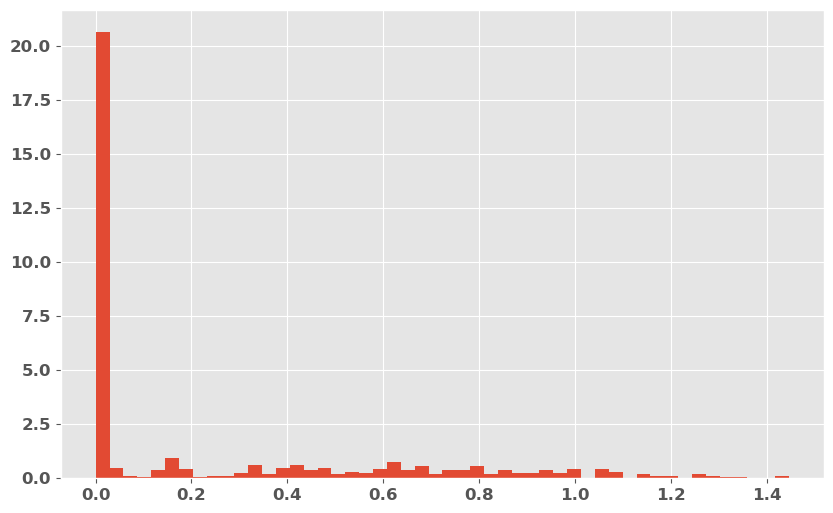

In [6]:
plt.hist(cleaned_df["escape_rate"].to_list(), bins= 50, density=True)

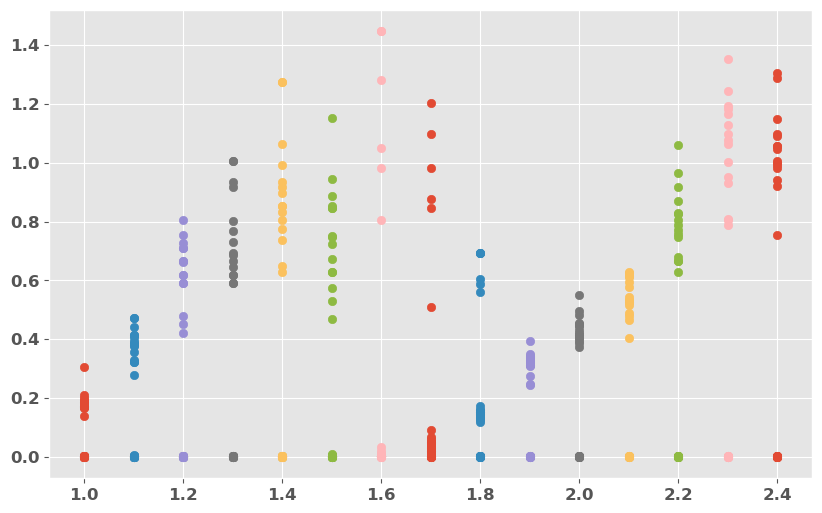

In [7]:
# Plot only by w0
for w0 in w0_range:
    x = cleaned_df["w0"].loc[cleaned_df["w0"]==w0].to_list()
    y = cleaned_df["escape_rate"].loc[cleaned_df["w0"]==w0].to_list()    
    plt.scatter(x, y)
    

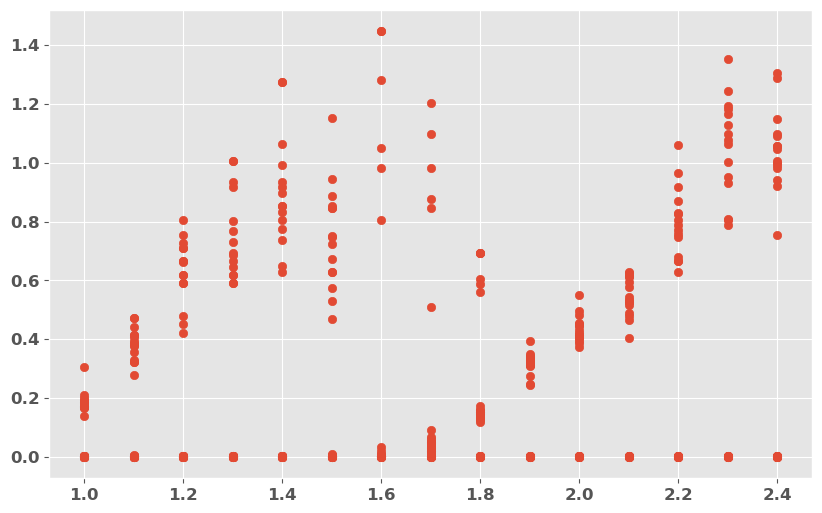

In [8]:
x = cleaned_df["w0"]
y = cleaned_df["escape_rate"]
plt.scatter(x,y)   

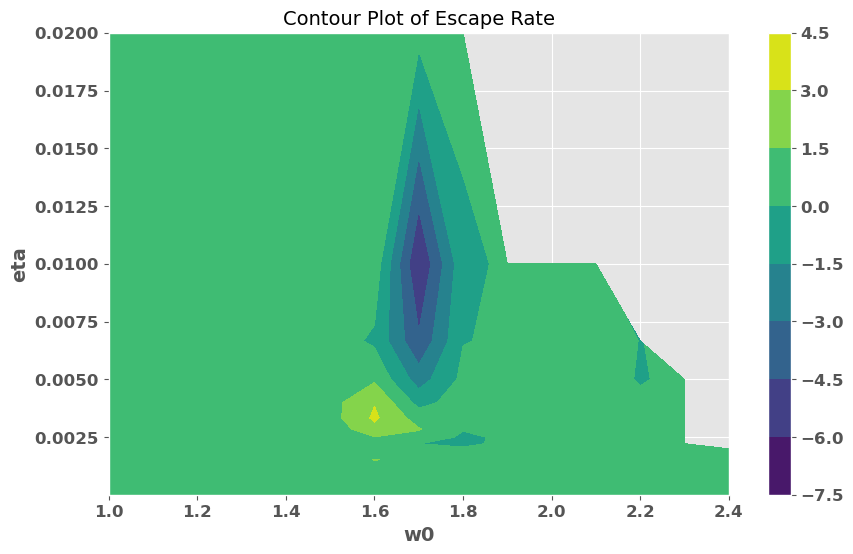

In [11]:
# Create a grid for interpolation
w0_unique = np.unique(cleaned_df['w0'])
eta_unique = np.unique(cleaned_df['lr/B'])
w0_range, lrB_range = np.meshgrid(w0_unique, eta_unique)

# Interpolate escape_rate values onto the grid
escape_rate_interpolated = griddata((cleaned_df['w0'], cleaned_df['lr/B']), cleaned_df['escape_rate'], (w0_range, lrB_range), method='cubic')

# Generate the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(w0_range, lrB_range, escape_rate_interpolated, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot of Escape Rate')
plt.xlabel('w0')
plt.ylabel('lr/B')
plt.show()

